PostId: 2019-04-25-171344
Title:MacKayのInformation Theory, Inference, and Learning Algorithms、6章〜

勉強会で読む事にしたMacKayの情報理論の本。

6章からのノート。

- [Information Theory, Inference, and Learning Algorithms](http://www.inference.org.uk/itprnn/book.html) 本家
- [1〜5章までのノート](https://karino2.github.io/2019/04/07/140022.html)

# 6章 Arithmetic codeとか

動画の方がわかりやすいのでまず動画を見る。

https://youtu.be/cJ_rhZ9DP9k

Huffmanコードのブロックがどうの、というのは、$$X^N$$を一つのアルファベットとみなしてエンコードする、というものだった。
当然場合の数は大量になるので、全部の同時確率を求めてエンコードしていくのはそれなりに大変。

arithmetic code自体は動画では大して分からなかった。テキスト読む方が良さそう。
exampleのtoss of bent coinをやるのが良い。

### Arithmetic codingの効率について考える

Exercise 6.1は効率についての話だが、少しはしょり過ぎてて良く分からないので、もうちょっと素朴な所から考える。

まず、結局はn文字の何かをエンコードする。
それは究極的にはこのn文字の出方の確率に対し、式5.17、つまり$$l_i = log_2 (1/p_i)$$に振るのが理想。

一方でArithmetic codingは、

1.系列を、特定の実数の範囲に対応させる
2. 1の確率の範囲は、この系列の実現しやすさをあらわす同時確率になっている
3. decodeは、この範囲に収まる所まで調べたら終わる

というもの。
この3の長さが、どのくらい式5.17に近いのか？というのが知りたい事。

ちょっとノーテーションが要るな。
並べて割り振ったアルファベットのi番目の確率を$$p_i$$として、それを0側から並べた累積分布関数を考えた時に、iの始まりを$$\underline{p_i}$$で、終わりを$$\bar{p_i}$$で表そう。

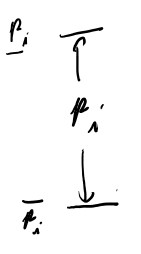

In [1]:
MeatPieImage()

上が0なのかややこしいが仕方ない。

デコードを終われる最短のビット数は、そのビット数で表される範囲がこの範囲に収まってる場合だ。
あるビットの列が表す範囲は、そこから0を無限につなげた物から、最後のビットを一つ増やした物の直前まで、という事になる。
この幅は、このビット列の桁の最後の数字の担当範囲となるので、1/2の桁数乗か？

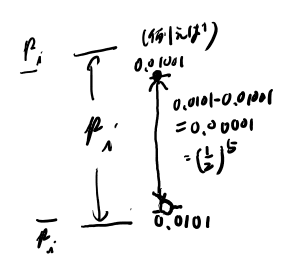

In [1]:
MeatPieImage()

このビットの長さ、というのは、1/2をk乗した時に上記の範囲が最初にこの範囲に収まるkという事になる。

さて、この$$\underline{p_i}$$とかは都合よく2で割っていくと区切りが良いとは限らない（Ex 6.1など参照）が、ちょうど良いとすれば、この長さは、1/2を累乗していった時にちょうど$$p_i$$になる所だ。

これを変形すると、以下のようになって、

$$(1/2)^{l_i}= p_i$$
$$log((1/2)^{l_i} )= log(p_i)$$
$$l_i = log_2 (1/p_i)$$

このコードは最適なコードになってる事が分かる。

さて、ちょうど良くないと端数の部分が出てくるが、これはちょうど2進数で余った範囲の期待値を取っていく事に相当し、たぶん余った幅に応じた長さの期待値となると思う。（長さにいつも同じだけの1/2乗が掛けられるので、極限はlogになる？）

だから無限に続くならこの端数は無視出来る。
無視出来ない影響は最後の一文字の所にだけ出るのかしら？
それはEx 6.1だな。

## 6.4 Lempel-Ziv coding

簡単なバージョンの具体例を計算してみて、非効率な所を理解するのが良い。
6.4の例をエンコードしてみる。
この時長さの桁が毎回かわる事に注意する。

最適性の証明は[Cover and Thomasのノート](https://karino2.github.io/2019/03/22/135325.html)の13.5.1を参照の事。